# 3D Computer Vision - Exercise 6
Olivier kanamugire

02.03.2025


## Task 1. Detection by color thresholding (1 point).

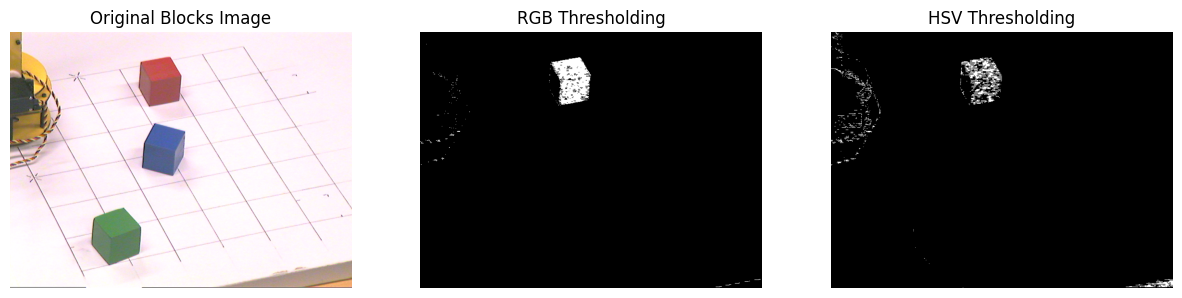

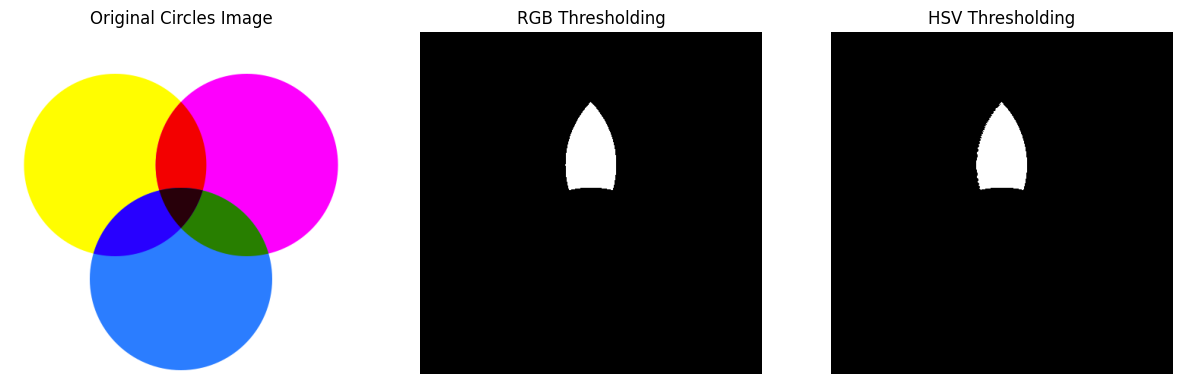

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_images(images, titles):
    fig, ax = plt.subplots(1, len(images), figsize=(15, 6))
    for idx, img in enumerate(images):
        ax[idx].imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        ax[idx].set_title(titles[idx])
        ax[idx].axis('off')
    plt.show()


# Load and convert images
blocks = cv2.imread('/content/blocks-col.png')
blocks_rgb = cv2.cvtColor(blocks, cv2.COLOR_BGR2RGB)
blocks_hsv = cv2.cvtColor(blocks, cv2.COLOR_BGR2HSV)

circles = cv2.imread('/content/circles.png')
circles_rgb = cv2.cvtColor(circles, cv2.COLOR_BGR2RGB)
circles_hsv = cv2.cvtColor(circles, cv2.COLOR_BGR2HSV)

# Define red color range in RGB
lower_red_rgb = np.array([150, 0, 0])
upper_red_rgb = np.array([255, 100, 100])

# Define red color range in HSV
lower_red_hsv = np.array([0, 120, 70])
upper_red_hsv = np.array([15, 255, 255])

# Apply color thresholding for blocks image
mask_rgb_blocks = cv2.inRange(blocks_rgb, lower_red_rgb, upper_red_rgb)
mask_hsv_blocks = cv2.inRange(blocks_hsv, lower_red_hsv, upper_red_hsv)

# Apply the same thresholds to the circles image
mask_rgb_circles = cv2.inRange(circles_rgb, lower_red_rgb, upper_red_rgb)
mask_hsv_circles = cv2.inRange(circles_hsv, lower_red_hsv, upper_red_hsv)

# Display results for blocks image
show_images([blocks_rgb, mask_rgb_blocks, mask_hsv_blocks],
            ["Original Blocks Image", "RGB Thresholding", "HSV Thresholding"])

# Display results for circles image
show_images([circles_rgb, mask_rgb_circles, mask_hsv_circles],
            ["Original Circles Image", "RGB Thresholding", "HSV Thresholding"])

### Comments
1. RGB performs reasonably well for segmentation in all cases.
2. The HSV segmentation in the blocks-col image is affected by noise due to the presence of yellowish regions, which overlap with the red hue range.
3. Both methods successfully segment the circles, but RGB appears to achieve slightly better results in this case.